In [ ]:
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Conv2D , MaxPooling2D , Flatten
from tensorflow.keras.optimizers import RMSprop , Adam
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
# import 所有需要的函式庫

Using TensorFlow backend.


In [ ]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

In [ ]:
x_train_image_ = x_train_image/255
x_test_image_ = x_test_image/255
# 每一個pixal值是0~255
# 標準化壓在0~1之間 所以直接除以255

In [ ]:
y_train_onehot = np.zeros([len(x_train_image) , 10])
for index,i in enumerate(y_train_label.flatten()):
    y_train_onehot[index,i] = 1

y_test_onehot = np.zeros([len(x_test_image) , 10])
for index,i in enumerate(y_test_label.flatten()):
  y_test_onehot[index,i] = 1
  
  # 製作onehot 的 label 
  # 如果label是3,2,6 分10類
  # onehot 結果就是
  # [[0,0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0]]

In [ ]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(Conv2D(filters=512, kernel_size=3, input_shape=(32, 32,3), activation='sigmoid', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(filters=128, kernel_size=3,  activation='sigmoid', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(filters=64, kernel_size=3,  activation='sigmoid', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(filters=32, kernel_size=3,  activation='sigmoid', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='sigmoid'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
# 建構model
# 多建構層數  model_cnn.add(Conv2D(filters=64, kernel_size=3,  activation='relu', padding='same'))
# 多加maxpooling層  model_cnn.add(MaxPooling2D(pool_size=(2, 2))) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 512)       14336     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 512)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       589952    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

In [ ]:
history = model_cnn.fit(x_train_image_, y_train_onehot,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                   validation_split=0.2)
# 開始訓練 

Epoch 1/50
313/313 [==============================] - 9s 28ms/step - loss: 2.3195 - accuracy: 0.1008 - val_loss: 2.3061 - val_accuracy: 0.1003
Epoch 2/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3181 - accuracy: 0.0967 - val_loss: 2.3184 - val_accuracy: 0.0980
Epoch 3/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3166 - accuracy: 0.0989 - val_loss: 2.3114 - val_accuracy: 0.1014
Epoch 4/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3157 - accuracy: 0.1001 - val_loss: 2.3247 - val_accuracy: 0.0997
Epoch 5/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3186 - accuracy: 0.0984 - val_loss: 2.3173 - val_accuracy: 0.1014
Epoch 6/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3113 - accuracy: 0.1013 - val_loss: 2.1806 - val_accuracy: 0.1650
Epoch 7/50
313/313 [==============================] - 8s 26ms/step - loss: 2.0260 - accuracy: 0.2463 - val_loss: 1.9599 - val_accuracy: 0.2767

In [ ]:
scores = model_cnn.evaluate(x_train_image_, y_train_onehot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))
# 測試一下training data

1563/1563 [==============================] - 6s 4ms/step - loss: 1.0002 - accuracy: 0.6415

	[Info] Accuracy of training data = 64.1%


In [ ]:
scores = model_cnn.evaluate(x_test_image_, y_test_onehot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  
# 測試一下testing data

313/313 [==============================] - 1s 4ms/step - loss: 1.0876 - accuracy: 0.6075

	[Info] Accuracy of training data = 60.8%


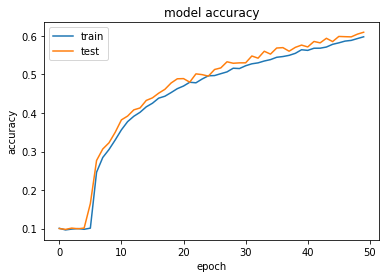

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# 畫出train test 的acc

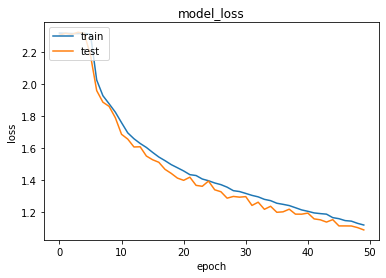

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# 畫出train test 的 loss

In [ ]:
model_nn = tf.keras.models.Sequential()
model_nn.add(Dense(2000, activation='sigmoid', input_shape=(3072,)))
model_nn.add(Dense(1000, activation='sigmoid'))
model_nn.add(Dense(500, activation='sigmoid'))
model_nn.add(Dense(250, activation='sigmoid'))
model_nn.add(Dense(125, activation='sigmoid'))
model_nn.add(Dense(10, activation='softmax'))
model_nn.summary()
model_nn.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])
# 架一個 nn 的 model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2000)              6146000   
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_15 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_16 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_17 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1260      
Total params: 8,805,385
Trainable params: 8,805,385
Non-trainable params: 0
____________________________________________

In [ ]:
x_train_image_flatten = x_train_image_.reshape(50000 , 3072)
x_test_image_flatten = x_test_image_.reshape(10000, 3072)

In [ ]:
history_nn = model_nn.fit(x_train_image_flatten, y_train_onehot,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                   validation_split=0.2)

Epoch 1/40
352/352 [==============================] - 2s 6ms/step - loss: 2.1124 - accuracy: 0.1743 - val_loss: 2.0200 - val_accuracy: 0.2136
Epoch 2/40
352/352 [==============================] - 2s 5ms/step - loss: 1.9028 - accuracy: 0.2852 - val_loss: 1.8722 - val_accuracy: 0.3070
Epoch 3/40
352/352 [==============================] - 2s 5ms/step - loss: 1.7965 - accuracy: 0.3432 - val_loss: 1.7467 - val_accuracy: 0.3574
Epoch 4/40
352/352 [==============================] - 2s 5ms/step - loss: 1.7369 - accuracy: 0.3647 - val_loss: 1.7280 - val_accuracy: 0.3722
Epoch 5/40
352/352 [==============================] - 2s 5ms/step - loss: 1.6960 - accuracy: 0.3825 - val_loss: 1.6822 - val_accuracy: 0.3920
Epoch 6/40
352/352 [==============================] - 2s 5ms/step - loss: 1.6471 - accuracy: 0.4023 - val_loss: 1.6243 - val_accuracy: 0.4158
Epoch 7/40
352/352 [==============================] - 2s 5ms/step - loss: 1.6247 - accuracy: 0.4088 - val_loss: 1.6892 - val_accuracy: 0.3882
Epoch 

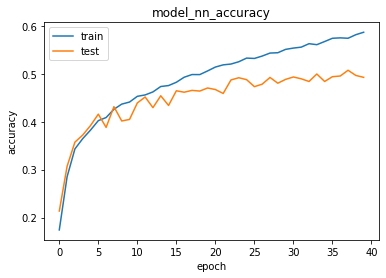

In [ ]:
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.title('model_nn_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# 畫出train test 的acc

In [ ]:
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('model_nn_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# 畫出train test 的 loss